## 1. Data extraction

### 1.1 download data

In [1]:
import os
import urllib.request
import zipfile

# dataset address
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
red_wine_path = os.path.join('./', 'winequality-red.csv')
# start download
urllib.request.urlretrieve(red_wine_url,red_wine_path)

# dataset address
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
white_wine_path = os.path.join('./', 'winequality-white.csv')
# start download
urllib.request.urlretrieve(white_wine_url,white_wine_path)

('./winequality-white.csv', <http.client.HTTPMessage at 0x7f9efd2ab550>)

### 1.2 data describe

The wine quality evaluation data of the UCI machine learning community contains two files: winequality-red.csv and winequality-white.csv. Sample data for red wine and white wine respectively.
The purpose of the case study is the characteristics of red wine and white wine to distinguish between red wine and white wine. This is a two-class problem.

The following is a description of the data characteristics:
1. fixed acidity：

2. volatile acidity：

3. citric acid：

4. residual sugar：

5. chlorides：

6. free sulfur dioxide：

7. total sulfur dioxide：

8. density：

9. pH

10. sulphates：

11. alcohol：

12. quality：

## 2. Data cleanup

In [2]:
import pandas as pd

red_df = pd.read_csv("winequality-red.csv",sep=";")
# For the red wine dataset, label values with a 1
red_df['winetype'] = 1
display(red_df.head())

white_df = pd.read_csv("winequality-white.csv",sep=";")
# For the white wine dataset label the values in this column with a 0
white_df['winetype'] = 0
display(white_df.head())

# General overviews of dataset
df = pd.concat([red_df,white_df])
display(df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [3]:
# delet null value 
df = df.dropna()

# delet duplicates value 
df = df.drop_duplicates()

In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


## 3. Data visualization

(13.5, -0.5)

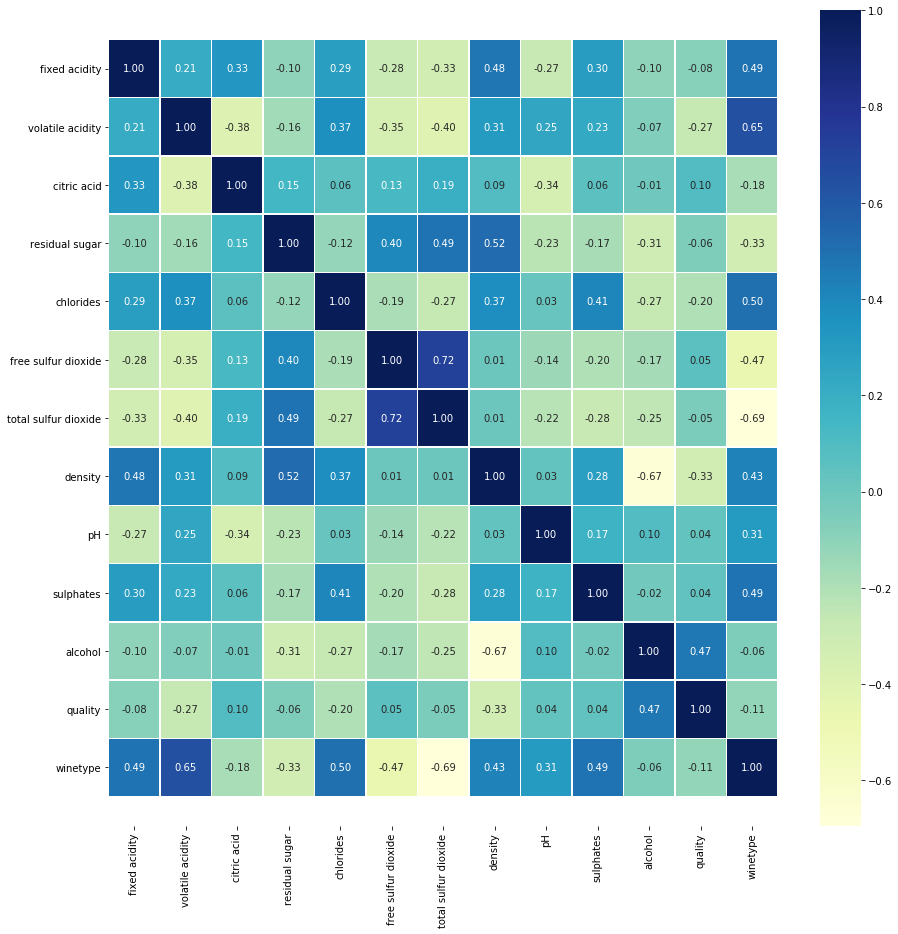

In [5]:
# The visualization of the corrolation between the wine data varaiables 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot corrolation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

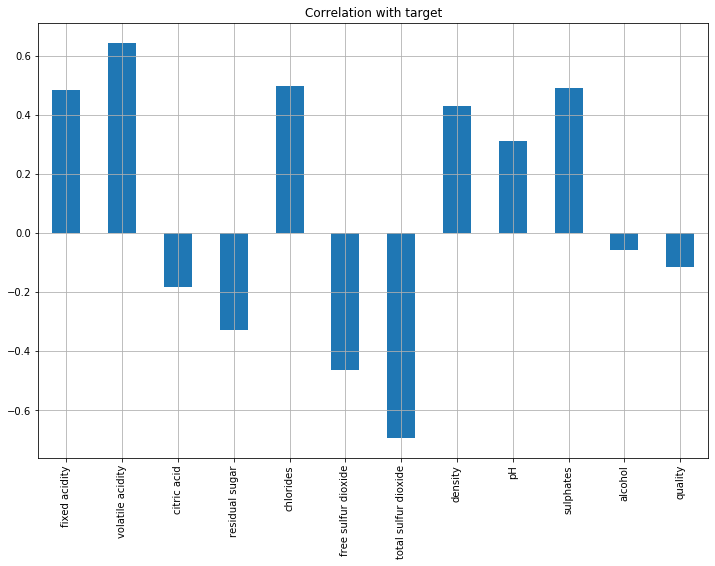

In [6]:
df.drop('winetype', axis=1).corrwith(df.winetype).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

## 4. Descriptive/Predictive analytics

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop('winetype', axis=1)
y = df.winetype

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3724, 12), (1596, 12), (3724,), (1596,))

### 4.1. KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

scores = np.mean(cross_val_score(knn_classifier, X_test, y_test, cv = 5)) # cross-validation=5-fold
print("KNeighborsClassifier Score:",scores)

KNeighborsClassifier Score: 0.9260638714733542


### 4.2.Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(random_state=24)
rand_forest.fit(X_train, y_train)

scores = np.mean(cross_val_score(knn_classifier, X_test, y_test, cv = 5)) # cross-validation=5-fold
print("RandomForestClassifier Score:",scores)

RandomForestClassifier Score: 0.9260638714733542


In [26]:
for x,y in zip(df.columns,rand_forest.feature_importances_):
    print("{0}\tfeature_importance_score={1}".format(x,round(y,2)))

fixed acidity	feature_importance_score=0.04
volatile acidity	feature_importance_score=0.11
citric acid	feature_importance_score=0.02
residual sugar	feature_importance_score=0.06
chlorides	feature_importance_score=0.29
free sulfur dioxide	feature_importance_score=0.04
total sulfur dioxide	feature_importance_score=0.28
density	feature_importance_score=0.07
pH	feature_importance_score=0.02
sulphates	feature_importance_score=0.05
alcohol	feature_importance_score=0.01
quality	feature_importance_score=0.0
